In [3]:
# %matplotlib inline

In [4]:
! jupyter nbconvert --to script plot_figures.ipynb

[NbConvertApp] Converting notebook plot_figures.ipynb to script
[NbConvertApp] Writing 8077 bytes to plot_figures.py


In [5]:
import pickle as pk 
import pandas as pd
import os 
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy as cpy 

In [5]:
# os.listdir("../")
# for m in method_list:
#     file_name = "../"+method_to_save_dir_map[m]+method_to_save_file_map[m]+".pickle"
#     new_file_name = file_name.replace("freiburg","intel")
#     os.system("cp "+file_name+" "+new_file_name)

In [6]:
env_list = ["Intel", "Freiburg", "FHW"] # add fhw later 
method_list = ["gng", "gng_top", "gng_top_feedback", "prm_1000", "prm_4000", "prm_2000"]

# roadmap_types = ["gng_top", "gng"]

method_env_to_pickle_file_map = {}

def get_file_path(env:str,method:str)->str:
    map_naming = {"Intel": "intel", "Freiburg": "freiburg", "FHW":"fhw"}
    method_dir = {"gng": "gng_output/", "gng_top": "gng_top_output/", "gng_top_feedback": "gng_top_feedback_output/", "prm_1000": "prm_output/",
                     "prm_4000": "prm_dense_output/", "prm_2000": "prm_dense_hilbert_output/"}

    method_naming = {"gng": "gng1208_200", "gng_top": "gngtop_1208_200", "gng_top_feedback": "gngtop_feedback_1208_200",
                               "prm_1000": "prm1208", "prm_4000": "prmdense_2500", "prm_2000": "prmdense_hilbert4000"}
    file_path = f"../{method_dir[method]}{map_naming[env]}_{method_naming[method]}.pickle"
    print(file_path)
    return file_path

for e in env_list:
    method_env_to_pickle_file_map[e]={}
    for m in method_list:
        method_env_to_pickle_file_map[e][m] = pk.load(open(get_file_path(e,m), "rb"))

../gng_output/intel_gng1208_200.pickle
../gng_top_output/intel_gngtop_1208_200.pickle
../gng_top_feedback_output/intel_gngtop_feedback_1208_200.pickle
../prm_output/intel_prm1208.pickle
../prm_dense_output/intel_prmdense_2500.pickle
../prm_dense_hilbert_output/intel_prmdense_hilbert4000.pickle
../gng_output/freiburg_gng1208_200.pickle
../gng_top_output/freiburg_gngtop_1208_200.pickle
../gng_top_feedback_output/freiburg_gngtop_feedback_1208_200.pickle
../prm_output/freiburg_prm1208.pickle
../prm_dense_output/freiburg_prmdense_2500.pickle
../prm_dense_hilbert_output/freiburg_prmdense_hilbert4000.pickle
../gng_output/fhw_gng1208_200.pickle
../gng_top_output/fhw_gngtop_1208_200.pickle
../gng_top_feedback_output/fhw_gngtop_feedback_1208_200.pickle
../prm_output/fhw_prm1208.pickle
../prm_dense_output/fhw_prmdense_2500.pickle
../prm_dense_hilbert_output/fhw_prmdense_hilbert4000.pickle


In [7]:
pd_df = pd.DataFrame.from_dict({"Row_id":[],"all_method_success":[],"MAP":[],"Method":[],"success":[], "node_explored":[], "path_cost":[]})
def check_if_need_plotting(i,env):
    method_list = ["gng", "gng_top", "gng_top_feedback", "prm_4000", "prm_2000"]
    bool_list= [method_env_to_pickle_file_map[env][m][0][i] for m in method_list]
    return sum(bool_list)==len(bool_list)

for env in env_list:
    for m in method_list:
        for i,data in enumerate(zip(*method_env_to_pickle_file_map[env][m])):
            s, n, p = data
            pd_df.loc[len(pd_df)] = (i,check_if_need_plotting(i,env),env,m,s,n if n is not None else "NA",p if p is not None else "NA")
#             pd_df.loc[len(pd_df)] = (i,check_if_need_plotting(i),"Dummy",m,s,n,p)   

In [8]:
pd_df.head()

,Row_id,all_method_success,MAP,Method,success,node_explored,path_cost
0,0.0,0.0,Intel,gng,1.0,312,15.8515
1,1.0,1.0,Intel,gng,1.0,32,2.97691
2,2.0,0.0,Intel,gng,0.0,NA,NA
3,3.0,0.0,Intel,gng,1.0,538,27.3121
4,4.0,0.0,Intel,gng,0.0,NA,NA


In [12]:
filtered_method_list = ["gng", "gng_top", "gng_top_feedback", "prm_4000", "prm_2000"]

In [28]:
# ax = sns.barplot(data = pd_df[(pd_df["all_method_success"]==1) & 
#                               (pd_df["Method"].isin(filtered_method_list))],
#                 y = "node_explored",hue = "MAP" ,  x= "Method")
# plt.savefig("node_explored_bar_plot.eps")

In [29]:
# ax = sns.barplot(data = pd_df[(pd_df["all_method_success"]==1) & 
#                               (pd_df["Method"].isin(filtered_method_list))],
#                 y = "node_explored",x = "MAP" ,  hue= "Method")
# # plt.savefig("node_explored_bar_plot.eps")

In [30]:
# plt.gcf().clear()
# plt.clf()

Method


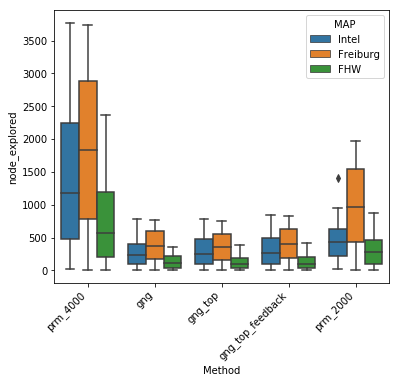

In [13]:
plot_df =cpy( pd_df[(pd_df["all_method_success"]==1) & 
                              (pd_df["Method"].isin(filtered_method_list))])
plot_df["node_explored"] = pd.to_numeric(plot_df["node_explored"])
plt.figure(figsize=(6,6))
ax = sns.boxplot(data =plot_df,
                y = "node_explored", hue = "MAP", order=["prm_4000","gng", "gng_top", "gng_top_feedback", "prm_2000"],  x= "Method")
plt.subplots_adjust(bottom=0.25)
ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
#     fontweight='light',
#     fontsize='x-large'
)
plt.savefig("node_explored_box_plot.eps")
print("Method")


## list(ax.get_xticklabels())

In [14]:
plt.gcf().clear()
plt.clf()

<Figure size 432x288 with 0 Axes>

# Success Count Plots

In [17]:
sc_df = pd.DataFrame.from_dict({"MAP":[],"Method":[],"success_count":[]})
for env in env_list:
    for m in method_list:
        c_ = sum(pd_df[(pd_df["Method"]==m) & (pd_df["MAP"]==env)]["success"].tolist())
        sc_df.loc[len(sc_df)] = (env,m,c_)

In [32]:
# Normalization Code
sc_df["ground_success"] = [sc_df[(sc_df["Method"]=="prm_4000") & (sc_df["MAP"]==M)]["success_count"].tolist()[0] for M in sc_df["MAP"]]
sc_df["success metric"] = [100.0* s/g for s,g in zip(sc_df["success_count"],sc_df["ground_success"])]

In [31]:
sc_df["success metric"]

0     31200.0
1     32300.0
2     36000.0
3      5000.0
4     38600.0
5     12600.0
6     29100.0
7     27800.0
8     34700.0
9     14200.0
10    35000.0
11    34300.0
12    15600.0
13    18600.0
14    36200.0
15     8200.0
16    37800.0
17    16200.0
Name: success metric, dtype: float64

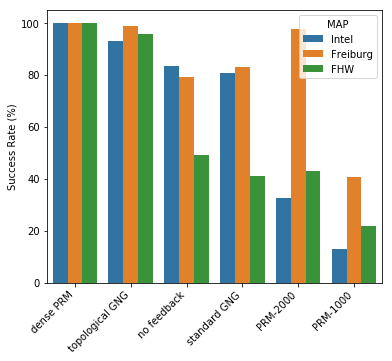

In [29]:
plt.figure(figsize=(6,6))
ax = sns.barplot(data = sc_df, y = "success metric", hue = "MAP", order=["prm_4000","gng_top_feedback","gng_top", "gng", "prm_2000", "prm_1000"],  x= "Method")

plt.subplots_adjust(bottom=0.25)
ax.set(xlabel='', ylabel='Success Rate (%)')
ax.set_xticklabels(
    ["dense PRM","topological GNG","no feedback", "standard GNG", "PRM-2000", "PRM-1000"], 
    rotation=45, 
    horizontalalignment='right',
)
plt.savefig("success_count_plots.png", dpi=300)

In [36]:
plt.gcf().clear()
plt.clf()

<Figure size 432x288 with 0 Axes>

# SPC Metric

In [37]:
spc_df = cpy(pd_df)

In [38]:
spc_df = pd.DataFrame.from_dict({"MAP":[],"Method":[],"spc_metric":[]})

def calculate_spc_metric(env, method):
    pk_file_m = method_env_to_pickle_file_map[env][method]
    pk_file_dense = method_env_to_pickle_file_map[env]["prm_4000"]
    
    row_calculus_sum = 0
    for i in range(len(pk_file_m[0])):
        if pk_file_dense[0][i] and pk_file_m[0][i]:
            row_calculus_sum += pk_file_dense[2][i] / pk_file_m[2][i] #( max(pk_file_dense[2][i],pk_file_m[2][i]) )
            
    return row_calculus_sum

for e in env_list:
    for m in method_list:
        spc_metric = calculate_spc_metric(e,m)
        spc_df.loc[len(spc_df)] = (e,m,spc_metric)

In [39]:
# Normalization Code
spc_df["ground_spc_metric"] = [spc_df[(spc_df["Method"]=="prm_4000") & (spc_df["MAP"]==M)]["spc_metric"].tolist()[0] for M in spc_df["MAP"]]
spc_df["SPC metric"] = [s/g for s,g in zip(spc_df["spc_metric"],spc_df["ground_spc_metric"])]    
spc_df

,MAP,Method,spc_metric,ground_spc_metric,SPC metric
0,Intel,gng,319.644558,386.0,0.828095
1,Intel,gng_top,316.777711,386.0,0.820668
2,Intel,gng_top_feedback,351.107738,386.0,0.909606
3,Intel,prm_1000,47.775855,386.0,0.123772
4,Intel,prm_4000,386.000000,386.0,1.000000
5,Intel,prm_2000,125.214676,386.0,0.324390
6,Freiburg,gng,287.403857,350.0,0.821154
7,Freiburg,gng_top,271.341329,350.0,0.775261
8,Freiburg,gng_top_feedback,328.307342,350.0,0.938021
9,Freiburg,prm_1000,126.686790,350.0,0.361962


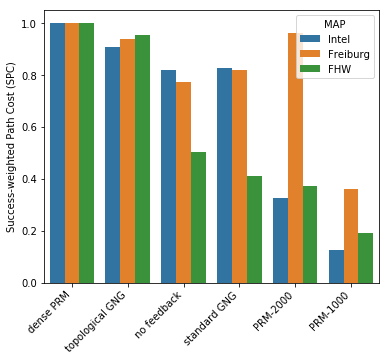

In [40]:
plt.figure(figsize=(6,6))
ax = sns.barplot(data = spc_df, y = "SPC metric", order=["prm_4000","gng_top_feedback","gng_top", "gng", "prm_2000", "prm_1000"], hue = "MAP" , x= "Method")
plt.subplots_adjust(bottom=0.25)
ax.set(xlabel='', ylabel='Success-weighted Path Cost (SPC)')
ax.set_xticklabels(
    ["dense PRM","topological GNG","no feedback", "standard GNG", "PRM-2000", "PRM-1000"], 
    rotation=45, 
    horizontalalignment='right',

)

plt.savefig("spc_metric.png", dpi=300)

In [41]:
plt.gcf().clear()
plt.clf()

<Figure size 432x288 with 0 Axes>

# SNE metric


In [42]:
sne_df = cpy(pd_df)
sne_df = pd.DataFrame.from_dict({"MAP":[],"Method":[],"sne_metric":[]})

def calculate_sne_metric(env, method):
    pk_file_m = method_env_to_pickle_file_map[env][method]
    pk_file_dense = method_env_to_pickle_file_map[env]["prm_4000"]
    
    row_calculus_sum = 0
    for i in range(len(pk_file_m[0])):
        if pk_file_dense[0][i] and pk_file_m[0][i]:
            row_calculus_sum += pk_file_dense[1][i] / (pk_file_m[1][i])#( max(pk_file_dense[2][i],pk_file_m[2][i]) )
            
    return row_calculus_sum

for e in env_list:
    for m in method_list:
        sne_metric = calculate_sne_metric(e,m)
        sne_df.loc[len(sne_df)] = (e,m,sne_metric)

In [43]:
sne_df

,MAP,Method,sne_metric
0,Intel,gng,1528.826430
1,Intel,gng_top,1545.652090
2,Intel,gng_top_feedback,1639.212013
3,Intel,prm_1000,329.256996
4,Intel,prm_4000,386.000000
5,Intel,prm_2000,349.833494
6,Freiburg,gng,1370.619151
7,Freiburg,gng_top,1405.556767
8,Freiburg,gng_top_feedback,1593.058009
9,Freiburg,prm_1000,695.481041


In [44]:
# normalization code
sne_df["ground_sne_metric"] = [sne_df[(sne_df["Method"]=="prm_4000") & (sne_df["MAP"]==M)]["sne_metric"].tolist()[0] for M in sne_df["MAP"]]
sne_df["SNE metric"] = [s/g for s,g in zip(sne_df["sne_metric"],sne_df["ground_sne_metric"])]  

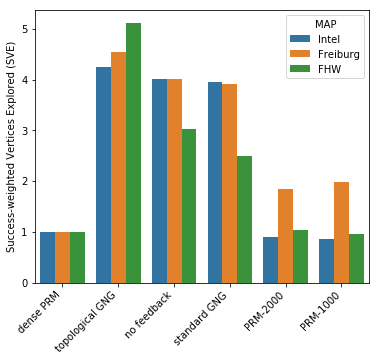

In [45]:
plt.figure(figsize=(6,6))
ax = sns.barplot(data = sne_df, y = "SNE metric", order=["prm_4000","gng_top_feedback","gng_top", "gng", "prm_2000", "prm_1000"], hue = "MAP" ,  x= "Method")
# plt.show()
plt.subplots_adjust(bottom=0.25)
ax.set(xlabel='', ylabel='Success-weighted Vertices Explored (SVE)')
ax.set_xticklabels(
    ["dense PRM","topological GNG","no feedback", "standard GNG", "PRM-2000", "PRM-1000"], 
    rotation=45, 
    horizontalalignment='right',
)
plt.savefig("sve_metric.png", dpi=300)

In [46]:
sne_df

,MAP,Method,sne_metric,ground_sne_metric,SNE metric
0,Intel,gng,1528.826430,386.0,3.960690
1,Intel,gng_top,1545.652090,386.0,4.004280
2,Intel,gng_top_feedback,1639.212013,386.0,4.246663
3,Intel,prm_1000,329.256996,386.0,0.852997
4,Intel,prm_4000,386.000000,386.0,1.000000
5,Intel,prm_2000,349.833494,386.0,0.906304
6,Freiburg,gng,1370.619151,350.0,3.916055
7,Freiburg,gng_top,1405.556767,350.0,4.015876
8,Freiburg,gng_top_feedback,1593.058009,350.0,4.551594
9,Freiburg,prm_1000,695.481041,350.0,1.987089
